In [192]:
import pandas as pd

db_folder = '/home/georgy/Documents/deepfakes/'

data_file = db_folder + 'LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
data_pred_file = 'train_scores/scores-mfcc-asvspoof21-LA.txt'

In [193]:
data = pd.read_csv(data_file, sep=' ', header=None)

data = data[[0, 1, 3, 4]]
data['label'] = data[4].apply(lambda x: 1 if x=='bonafide' else 0)
data = data.rename(columns={0: 'speaker', 1: 'record', 3: 'algo', 4: 'bona or spoof'})
data

,speaker,record,algo,bona or spoof,label
0,LA_0079,LA_T_1138215,-,bonafide,1
1,LA_0079,LA_T_1271820,-,bonafide,1
2,LA_0079,LA_T_1272637,-,bonafide,1
3,LA_0079,LA_T_1276960,-,bonafide,1
4,LA_0079,LA_T_1341447,-,bonafide,1
...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0
25366,LA_0098,LA_T_9779814,A06,spoof,0
25367,LA_0098,LA_T_9783312,A06,spoof,0
25368,LA_0098,LA_T_9839348,A06,spoof,0


In [194]:
data_pred = pd.read_csv(data_pred_file, sep=' ', header=None)
# Выбираем эвристическим путем
thresshold = 1.6
data_pred['label_pred'] = data_pred[1].apply(lambda x: 1 if x >= thresshold else 0)
data_pred = data_pred.rename(columns={0: 'record', 1: 'score'})
data_pred

,record,score,label_pred
0,LA_T_1138215,2.060301,1
1,LA_T_1271820,1.795467,1
2,LA_T_1272637,1.737032,1
3,LA_T_1276960,1.535420,0
4,LA_T_1341447,1.332677,0
...,...,...,...
25365,LA_T_9717580,0.890873,0
25366,LA_T_9779814,0.556559,0
25367,LA_T_9783312,0.731099,0
25368,LA_T_9839348,1.478109,0


In [195]:
data = data.merge(right=data_pred, on='record')

In [196]:
data

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0079,LA_T_1138215,-,bonafide,1,2.060301,1
1,LA_0079,LA_T_1271820,-,bonafide,1,1.795467,1
2,LA_0079,LA_T_1272637,-,bonafide,1,1.737032,1
3,LA_0079,LA_T_1276960,-,bonafide,1,1.535420,0
4,LA_0079,LA_T_1341447,-,bonafide,1,1.332677,0
...,...,...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0,0.890873,0
25366,LA_0098,LA_T_9779814,A06,spoof,0,0.556559,0
25367,LA_0098,LA_T_9783312,A06,spoof,0,0.731099,0
25368,LA_0098,LA_T_9839348,A06,spoof,0,1.478109,0


In [197]:
accuracy = (data.shape[0] - data[data['label'] != data['label_pred']].shape[0]) / data.shape[0]
accuracy

0.953212455656287

In [198]:
FP = data[(data['label'] == 0) & (data['label_pred'] == 1)]
FP

,speaker,record,algo,bona or spoof,label,score,label_pred
14352,LA_0081,LA_T_1392859,A04,spoof,0,1.811807,1
14773,LA_0083,LA_T_3311657,A04,spoof,0,1.601602,1
14786,LA_0083,LA_T_3844259,A04,spoof,0,1.653636,1
14851,LA_0083,LA_T_6522691,A04,spoof,0,1.881712,1
14876,LA_0083,LA_T_7441464,A04,spoof,0,1.889743,1
...,...,...,...,...,...,...,...
25352,LA_0098,LA_T_8834650,A06,spoof,0,1.788730,1
25354,LA_0098,LA_T_8955640,A06,spoof,0,1.601728,1
25358,LA_0098,LA_T_9342202,A06,spoof,0,1.665534,1
25360,LA_0098,LA_T_9413366,A06,spoof,0,1.684700,1


In [199]:
FN = data[(data['label'] == 1) & (data['label_pred'] == 0)]
FN

,speaker,record,algo,bona or spoof,label,score,label_pred
3,LA_0079,LA_T_1276960,-,bonafide,1,1.535420,0
4,LA_0079,LA_T_1341447,-,bonafide,1,1.332677,0
8,LA_0079,LA_T_1684951,-,bonafide,1,1.064846,0
12,LA_0079,LA_T_1779188,-,bonafide,1,1.483612,0
15,LA_0079,LA_T_1905558,-,bonafide,1,1.563939,0
...,...,...,...,...,...,...,...
2483,LA_0098,LA_T_3030505,-,bonafide,1,1.591390,0
2507,LA_0098,LA_T_4774940,-,bonafide,1,1.505444,0
2515,LA_0098,LA_T_5312236,-,bonafide,1,1.587801,0
2526,LA_0098,LA_T_6045722,-,bonafide,1,1.312561,0


In [200]:
TP = data[(data['label'] == 1) & (data['label_pred'] == 1)]
TP

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0079,LA_T_1138215,-,bonafide,1,2.060301,1
1,LA_0079,LA_T_1271820,-,bonafide,1,1.795467,1
2,LA_0079,LA_T_1272637,-,bonafide,1,1.737032,1
5,LA_0079,LA_T_1363611,-,bonafide,1,2.682263,1
6,LA_0079,LA_T_1596451,-,bonafide,1,1.768923,1
...,...,...,...,...,...,...,...
2574,LA_0098,LA_T_9387015,-,bonafide,1,2.128688,1
2575,LA_0098,LA_T_9497115,-,bonafide,1,1.789266,1
2576,LA_0098,LA_T_9557645,-,bonafide,1,2.758289,1
2577,LA_0098,LA_T_9737995,-,bonafide,1,1.942623,1


In [201]:
TN = data[(data['label'] == 0) & (data['label_pred'] == 0)]
TN

,speaker,record,algo,bona or spoof,label,score,label_pred
2579,LA_0079,LA_T_1004644,A01,spoof,0,-2.950679,0
2580,LA_0079,LA_T_1056709,A01,spoof,0,-3.286941,0
2581,LA_0079,LA_T_1195221,A01,spoof,0,-3.187097,0
2582,LA_0079,LA_T_1265032,A01,spoof,0,-3.742636,0
2583,LA_0079,LA_T_1287124,A01,spoof,0,-3.293533,0
...,...,...,...,...,...,...,...
25365,LA_0098,LA_T_9717580,A06,spoof,0,0.890873,0
25366,LA_0098,LA_T_9779814,A06,spoof,0,0.556559,0
25367,LA_0098,LA_T_9783312,A06,spoof,0,0.731099,0
25368,LA_0098,LA_T_9839348,A06,spoof,0,1.478109,0


In [202]:
# Насколько можем доверять модели, когда предсказывает метку 1 (речь натуральная)
precision = TP.shape[0] / (TP.shape[0] + FP.shape[0])
precision

0.8074204946996466

In [203]:
# Насколько модель покрывает положительный класс
recall = TP.shape[0] / (TP.shape[0] + FN.shape[0])
recall

0.7088018611865063

In [204]:
# среднее гармоническое
average_harmonic = 2 * precision * recall / (precision + recall)
average_harmonic

0.7549039851331818

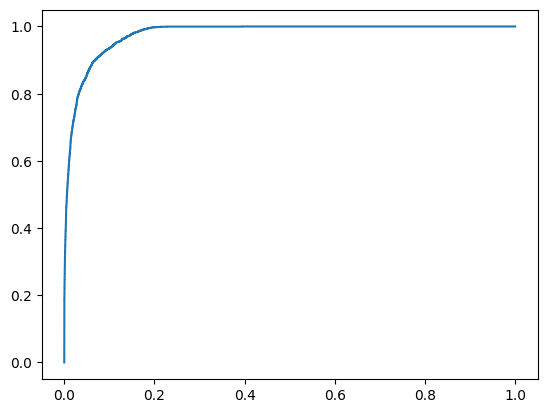

AUC_ROC: 0.97758431306658


In [205]:
# ROC curve and auc_roc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = data['label'].to_numpy()
scores = data['score'].to_numpy()

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC_ROC:', auc)

In [206]:
#threshold
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold

1.0699176015548488

In [207]:
#eer
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.08240094774252994

In [208]:
print(FP.shape[0])
print(FN.shape[0])
print(precision)
print(recall)
print(accuracy)

436
751
0.8074204946996466
0.7088018611865063
0.953212455656287
